In [1]:
__author__ = "Владислав Исупов"

1. Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
#plt.style.use('fivethirtyeight')
#plt.style.available
plt.style.use('classic')

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=['price'])

In [7]:
#X

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42) 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [13]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f'До:\t{X_train_scaled.shape}')
print(f'После:\t{X_train_tsne.shape}')

До:	(404, 13)
После:	(404, 2)


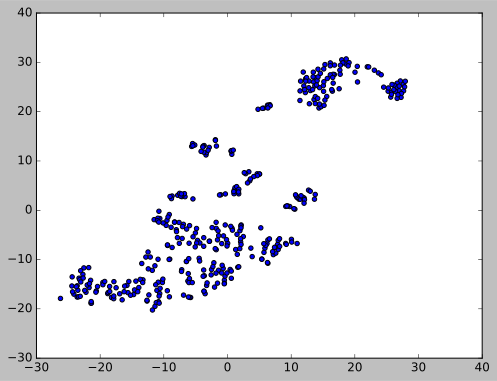

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

2. С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [18]:
train_labels = model.fit_predict(X_train_scaled, y_train)

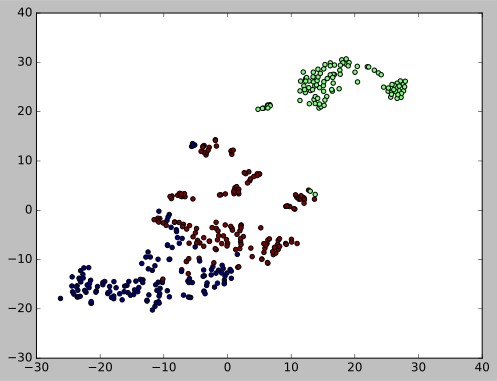

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

plt.show()

In [20]:
print('Кластер 0: {}'.format(y_train.loc[train_labels==0, 'price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[train_labels==1, 'price'].mean()))
print('Кластер 2: {}'.format(y_train.loc[train_labels==2, 'price'].mean()))

Кластер 0: 26.836879432624105
Кластер 1: 16.187378640776704
Кластер 2: 23.490624999999994


In [21]:
print('Кластер 0: {}'.format(X_train.loc[train_labels==0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[train_labels==1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[train_labels==2, 'CRIM'].mean()))

Кластер 0: 0.0965229078014185
Кластер 1: 12.927381747572817
Кластер 2: 0.7059768750000002


3.Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [22]:
test_label = model.predict(X_test_scaled)

In [23]:
print('Кластер 0: {}'.format(X_test.loc[test_label==0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[test_label==1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[test_label==2, 'CRIM'].mean()))

Кластер 0: 0.12199849999999997
Кластер 1: 10.707682121212121
Кластер 2: 0.41803862068965514
